In [9]:
import pandas as pd
import numpy as np
import scipy.stats as ss
from scipy.stats import entropy,ttest_ind,chi2_contingency, f_oneway

In [10]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [11]:
df= pd.read_csv("/Users/bolsolui/Documents/personal/MECAI/git/rais_dados/dados/escolaridade_sexo_salario/escolaridadeXSexoXsalario.csv", decimal=',', thousands='.')
df["total_pessoas_por_escolaridade"]=df.iloc[:, 2:13].sum(axis=1)
df.head()

,capital,faixa_remuneracao_media_sm,analfabeto,ate_5a_incompleto,5a_completo_fundamental,6a_a_9a_fundamental,fundamental_completo,medio_incompleto,medio_completo,superior_incompleto,superior_completo,mestrado,doutorado,sexo,ano,total_pessoas_por_escolaridade
0,Porto Velho - RO,"00:ate_0,50",0,1,3,90,19,135,115,6,24,0,0,F,2010,393
1,Porto Velho - RO,"01:0,51_a_1,00",7,18,40,76,333,234,2185,54,126,0,0,F,2010,3073
2,Porto Velho - RO,"02:1,01_a_1,50",84,240,332,1179,1937,1753,14012,568,531,4,0,F,2010,20640
3,Porto Velho - RO,"03:1,51_a_2,00",33,160,199,406,739,574,8566,491,1935,9,2,F,2010,13114
4,Porto Velho - RO,"04:2,01_a_3,00",38,228,187,261,551,329,5959,482,2333,14,3,F,2010,10385


In [12]:
df_capital = pd.pivot_table(df, values='total_pessoas_por_escolaridade', index=['capital',"ano"],
                       columns=['sexo'], aggfunc="sum")
df_capital.reset_index(inplace=True)

df_capital.head()

sexo,capital,ano,F,M
0,Aracaju - SE,2006,76503,101763
1,Aracaju - SE,2007,80064,106594
2,Aracaju - SE,2008,76592,106210
3,Aracaju - SE,2009,81784,111936
4,Aracaju - SE,2010,87296,119725


In [13]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)
df_capital_media= df_capital.groupby('capital')['F',"M"].mean().reset_index()
df_capital_media["distribuicao_F"]=round(df_capital_media['F']/df_capital_media['F'].sum(),5)
df_capital_media["distribuicao_M"]=round(df_capital_media['M']/df_capital_media['M'].sum(),5)
df_capital_media["total"] = df_capital_media['M']+df_capital_media['F']
df_capital_media["proporcao_total"] = (df_capital_media['total']/df_capital_media['total'].sum())
df_capital_media["contagem_es_F"] = df_capital_media["proporcao_total"] * df_capital_media['F'].sum()
df_capital_media["contagem_es_M"] = df_capital_media["proporcao_total"] * df_capital_media['M'].sum()
df_capital_media

/var/folders/7z/98kf6nzs505d1y91nml4ff2wzx529r/T/ipykernel_68874/1649358983.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_capital_media= df_capital.groupby('capital')['F',"M"].mean().reset_index()


sexo,capital,F,M,distribuicao_F,distribuicao_M,total,proporcao_total,contagem_es_F,contagem_es_M
0,Aracaju - SE,88988.7500,115712.3125,0.0113,0.0120,204701.0625,0.0117,91748.6172,112952.4453
1,Belo Horizonte - MG,581888.1250,655963.6250,0.0741,0.0678,1237851.7500,0.0706,554814.8358,683036.9142
2,Belém - PA,162855.4375,224083.9375,0.0207,0.0232,386939.3750,0.0221,173429.2542,213510.1208
3,Boa Vista - RR,37241.6875,37969.3750,0.0047,0.0039,75211.0625,0.0043,33710.1865,41500.8760
4,Brasília - DF,428731.0625,693694.8125,0.0546,0.0717,1122425.8750,0.0640,503080.0559,619345.8191
5,Campo Grande - MS,115197.8125,137656.1250,0.0147,0.0142,252853.9375,0.0144,113331.1124,139522.8251
6,Cuiabá - MT,100925.2500,124801.1875,0.0128,0.0129,225726.4375,0.0129,101172.3547,124554.0828
7,Curitiba - PR,412516.4375,438317.2500,0.0525,0.0453,850833.6875,0.0485,381350.3133,469483.3742
8,Florianópolis - SC,128949.6875,133165.7500,0.0164,0.0138,262115.4375,0.0150,117482.1891,144633.2484
9,Fortaleza - CE,311676.4375,410733.1875,0.0397,0.0425,722409.6250,0.0412,323789.6440,398619.9810


In [14]:
df_capital_media["capital"].unique()

array(['Aracaju - SE', 'Belo Horizonte - MG', 'Belém - PA',
       'Boa Vista - RR', 'Brasília - DF', 'Campo Grande - MS',
       'Cuiabá - MT', 'Curitiba - PR', 'Florianópolis - SC',
       'Fortaleza - CE', 'Goiânia - GO', 'João Pessoa - PB',
       'Macapá - AP', 'Maceió - AL', 'Manaus - AM', 'Natal - RN',
       'Palmas - TO', 'Porto Alegre - RS', 'Porto Velho - RO',
       'Recife - PE', 'Rio Branco - AC', 'Rio de Janeiro - RJ',
       'Salvador - BA', 'São Luiz - MA', 'São Paulo - SP',
       'Terezina - PI', 'Vitória - ES'], dtype=object)

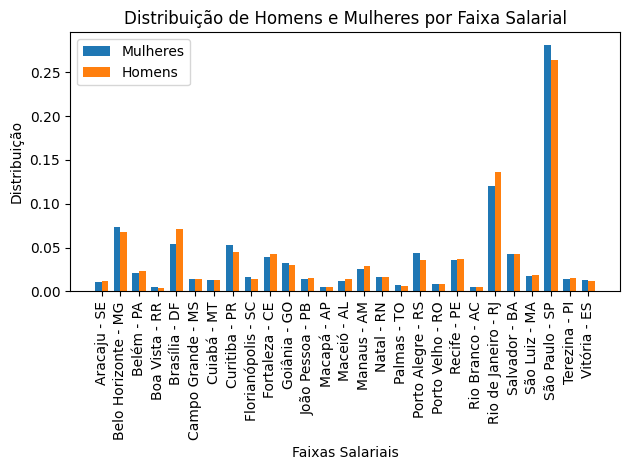

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Distribuições de mulheres e homens
distribuicao_F = df_capital_media["distribuicao_F"]
distribuicao_M = df_capital_media["distribuicao_M"]

# Faixas salariais
capitais = df_capital_media["capital"].unique()

# Posições das barras
posicoes = np.arange(len(capitais))

# Largura das barras
largura = 0.35

# Criar o gráfico de barras
fig, ax = plt.subplots()
barras_F = ax.bar(posicoes - largura/2, distribuicao_F, largura, label='Mulheres')
barras_M = ax.bar(posicoes + largura/2, distribuicao_M, largura, label='Homens')

# Adicionar rótulos, título e legenda
ax.set_xlabel('Faixas Salariais')
ax.set_ylabel('Distribuição')
ax.set_title('Distribuição de Homens e Mulheres por Faixa Salarial')
ax.set_xticks(posicoes)
ax.set_xticklabels(capitais, rotation=90)
ax.legend()

# Exibir o gráfico
plt.tight_layout()
plt.show()

Sera q temos diferencas significativas entre os estados no numero de homens e mulheres? 

In [16]:
df_capital_media

sexo,capital,F,M,distribuicao_F,distribuicao_M,total,proporcao_total,contagem_es_F,contagem_es_M
0,Aracaju - SE,88988.7500,115712.3125,0.0113,0.0120,204701.0625,0.0117,91748.6172,112952.4453
1,Belo Horizonte - MG,581888.1250,655963.6250,0.0741,0.0678,1237851.7500,0.0706,554814.8358,683036.9142
2,Belém - PA,162855.4375,224083.9375,0.0207,0.0232,386939.3750,0.0221,173429.2542,213510.1208
3,Boa Vista - RR,37241.6875,37969.3750,0.0047,0.0039,75211.0625,0.0043,33710.1865,41500.8760
4,Brasília - DF,428731.0625,693694.8125,0.0546,0.0717,1122425.8750,0.0640,503080.0559,619345.8191
5,Campo Grande - MS,115197.8125,137656.1250,0.0147,0.0142,252853.9375,0.0144,113331.1124,139522.8251
6,Cuiabá - MT,100925.2500,124801.1875,0.0128,0.0129,225726.4375,0.0129,101172.3547,124554.0828
7,Curitiba - PR,412516.4375,438317.2500,0.0525,0.0453,850833.6875,0.0485,381350.3133,469483.3742
8,Florianópolis - SC,128949.6875,133165.7500,0.0164,0.0138,262115.4375,0.0150,117482.1891,144633.2484
9,Fortaleza - CE,311676.4375,410733.1875,0.0397,0.0425,722409.6250,0.0412,323789.6440,398619.9810


In [17]:
ss.chisquare(f_obs=df_capital_media[["M","F"]],
             f_exp=df_capital_media[["contagem_es_M","contagem_es_F"]])

Power_divergenceResult(statistic=array([26910.41028171, 33129.61804973]), pvalue=array([0., 0.]))

Podemos ver que temos uma diferenca entre H e M em relacao a localização

In [18]:
#t-student test
t_statistic, p_value = ttest_ind(df_capital_media['distribuicao_M'], df_capital_media['distribuicao_F'])

print("Estatística t:", t_statistic)
print("Valor-p:", p_value)

#infelizmente com o  t-student nao vemos diferenca significativa

Estatística t: -0.00010033694874179148
Valor-p: 0.9999203266413966


In [19]:
#testando outra forma de qui quadrado
#nao deu bom 
contingency_table = df_capital_media[['contagem_es_M', 'contagem_es_F']].values.T


chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)

print("Estatística qui-quadrado:", chi2_stat)
print("Valor-p:", p_val)

Estatística qui-quadrado: 4.168004680303662e-25
Valor-p: 1.0


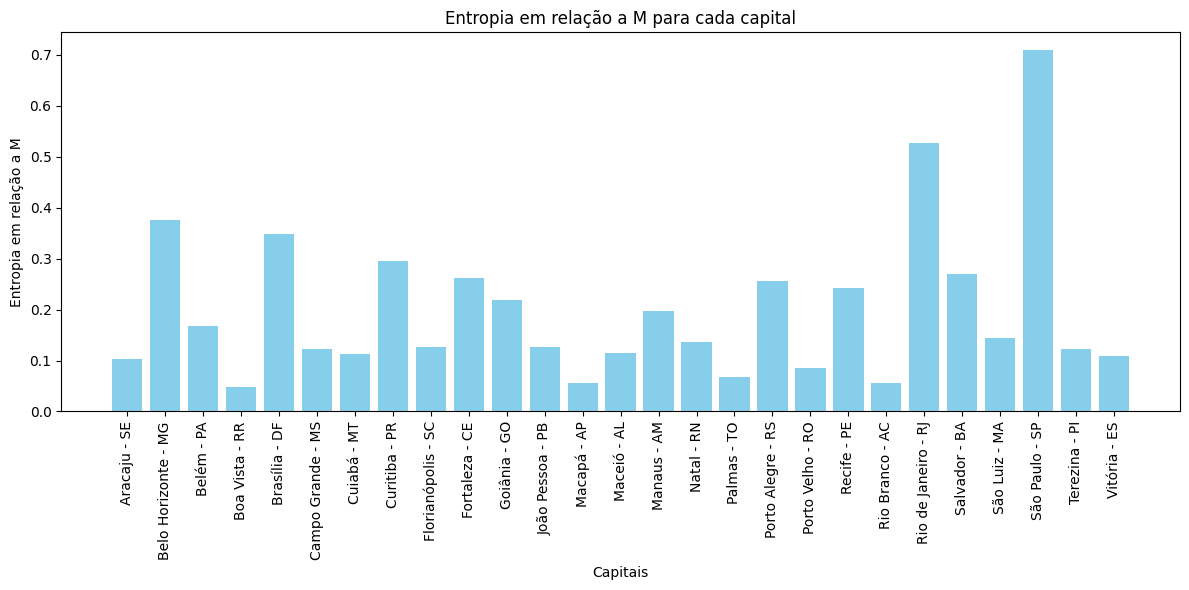

In [20]:
#vamos calcular a entropia:
df_capital_media['entropia_F_em_relacao_a_M'] = (df_capital_media['distribuicao_F'] * np.log(1/df_capital_media['distribuicao_F'])) + (df_capital_media['distribuicao_M'] * np.log(1/df_capital_media['distribuicao_M']))

# Faixas salariais
capitais = df_capital_media["capital"].unique()

entropia_M = df_capital_media["entropia_F_em_relacao_a_M"]
# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(capitais, entropia_M, color='skyblue')
plt.xlabel('Capitais')
plt.ylabel('Entropia em relação a M')
plt.title('Entropia em relação a M para cada capital')
plt.xticks(rotation=90)
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [21]:

#Kolmogorov-Smirnov 
from scipy.stats import ks_2samp
ks_statistic, p_value = ks_2samp(df_capital_media['F'],df_capital_media['M'])

print("Estatística KS:", ks_statistic)
print("Valor-p:", p_value)

Estatística KS: 0.2222222222222222
Valor-p: 0.5256377612776422


In [22]:
#teste ANOVA
#sem diferenca
F = df_capital_media['distribuicao_F']
M = df_capital_media['distribuicao_M']


# Realizar o teste ANOVA
f_statistic, p_value = f_oneway(M, F)

print("Estatística F:", f_statistic)
print("Valor-p:", p_value)

Estatística F: 1.0067503282770976e-08
Valor-p: 0.9999203266484469


#### sera que eu consigo ver se em algum estado temos uma diferenca significativa de homens que ganham mais que mulheres? 


In [23]:
#vou abrir outro notebook para fazer isso se nao vai virar zona